In [55]:
import numpy as np
import matplotlib.pyplot as plt

In [56]:
X = np.random.randn(1000,2)
X[:500,:]+=5

In [57]:
Y = np.vstack(([[1]]*500,[[0]]*500))


In [58]:
X.shape

(1000, 2)

In [59]:
Y.shape

(1000, 1)

In [60]:
Data = np.hstack((X,Y))

In [61]:
np.random.shuffle(Data)

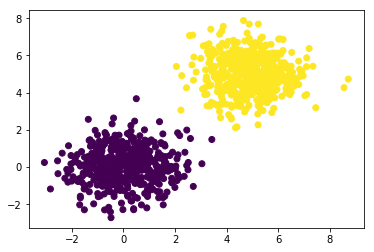

In [62]:
plt.scatter(Data[:,[0]],Data[:,[1]],c=Data[:,[-1]])

In [54]:
Data = np.hstack((np.ones((1000,1)),Data))

array([[ 1.        ,  0.04431978, -0.73655514,  0.        ],
       [ 1.        ,  0.1675944 , -0.16613628,  0.        ],
       [ 1.        ,  0.24477578, -0.38188705,  0.        ],
       ...,
       [ 1.        ,  4.13683386,  4.23865753,  1.        ],
       [ 1.        ,  6.01431872,  6.54721081,  1.        ],
       [ 1.        ,  5.49014718,  5.08665844,  1.        ]])

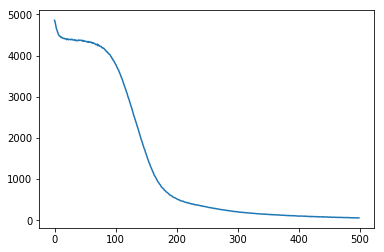

In [14]:
epochs = 500
eta0 = 1e-2
Vel = np.zeros((3,1))
w = np.random.randn(3,1)
mu = 0.8
batch = 1000
Costs = []
ada = np.zeros((3,1))
kappa = 0.9
for t in range(epochs):
    Sample=Data[np.random.choice(np.arange(Data.shape[0]),size=batch,replace=False)]
    phat = 1/(1+np.exp(-(Sample[:,:3]+np.random.randn(Sample.shape[0],3)*0.2)@w))
    Costs.append(-np.sum(Sample[:,[-1]]*np.log(phat)+(1-Sample[:,[-1]])*np.log(1-phat)))
    # Backpropagation
    # find gradients
    gradw = Sample[:,:3].T@(phat-Sample[:,[-1]])
    # find second moment and adjust for bias towards zero
    ada = kappa*ada+(1-kappa)*gradw**2
    ada /=(1-kappa**(t+1))
    # find first moment and adjust for bias towards zero
    Vel = mu*Vel+(1-mu)*gradw
    Vel/=(1-mu**(t+1))
    # adjust learning rate according to the first moment
    eta = eta0/(np.sqrt(ada+1e-10))
    # weight update
    w-=Vel*eta
    
    # print("Current Loss: {}".format(Costs[-1]))
    
plt.plot(Costs)

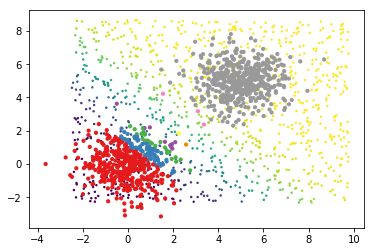

In [15]:
simX = np.hstack((np.ones((1000,1)),
                  (np.random.rand(1000,2)-0.5)*
                  (Data[:,1:3].max(axis=0,keepdims=1)-
                   Data[:,1:3].min(axis=0,keepdims=1))-Data[:,1:3].min(axis=0,keepdims=1)))
plt.scatter(simX[:,[1]],simX[:,[2]],c=1/(1+np.exp(-simX[:,:3]@w)),s=2)
plt.scatter(Data[:,[1]],Data[:,[2]],c=1/(1+np.exp(-Data[:,:3]@w)),cmap='Set1',s=10)
